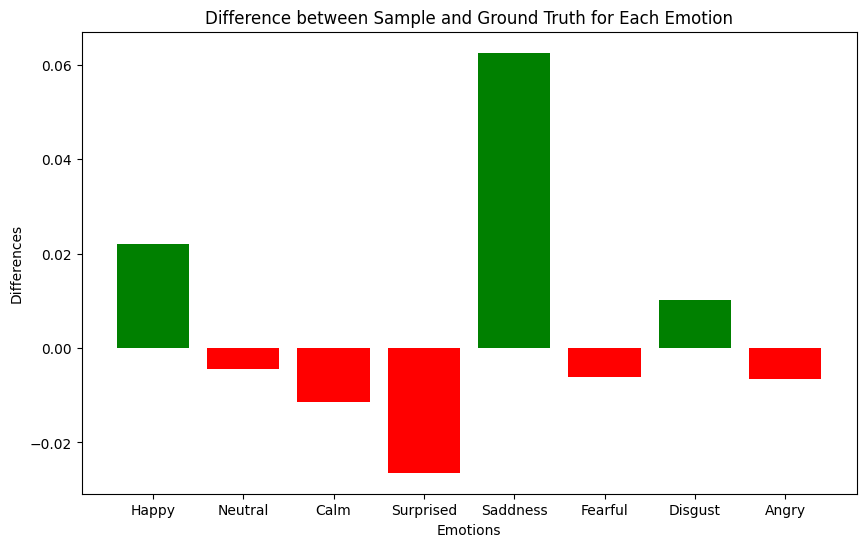

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the emotions
emotions = ["Happy", "Neutral", "Calm", "Surprised", "Saddness", "Fearful", "Disgust", "Angry"]
ground_truth = [0.15140957, 0.05619636, 0.04939349, 0.34024668, 0.24305308, 0.0592651 , 0.05107951, 0.04935617]
sample = [0.173497,
 0.051831,
 0.038007,
 0.313821,
 0.305666,
 0.053123,
 0.061232,
 0.042823]

# Calculate the differences
differences = np.array(sample) - np.array(ground_truth)

# Determine bar colors: 'green' for positive, 'red' for negative
colors = ['green' if diff > 0 else 'red' for diff in differences]

# Plotting the differences
plt.figure(figsize=(10, 6))
plt.bar(emotions, differences, color=colors)
plt.xlabel('Emotions')
plt.ylabel('Differences')
plt.title('Difference between Sample and Ground Truth for Each Emotion')
plt.show()


In [ ]:
print(emotions)

['Happy', 'Neutral', 'Calm', 'Surprised', 'Saddness', 'Fearful', 'Disgust', 'Angry']


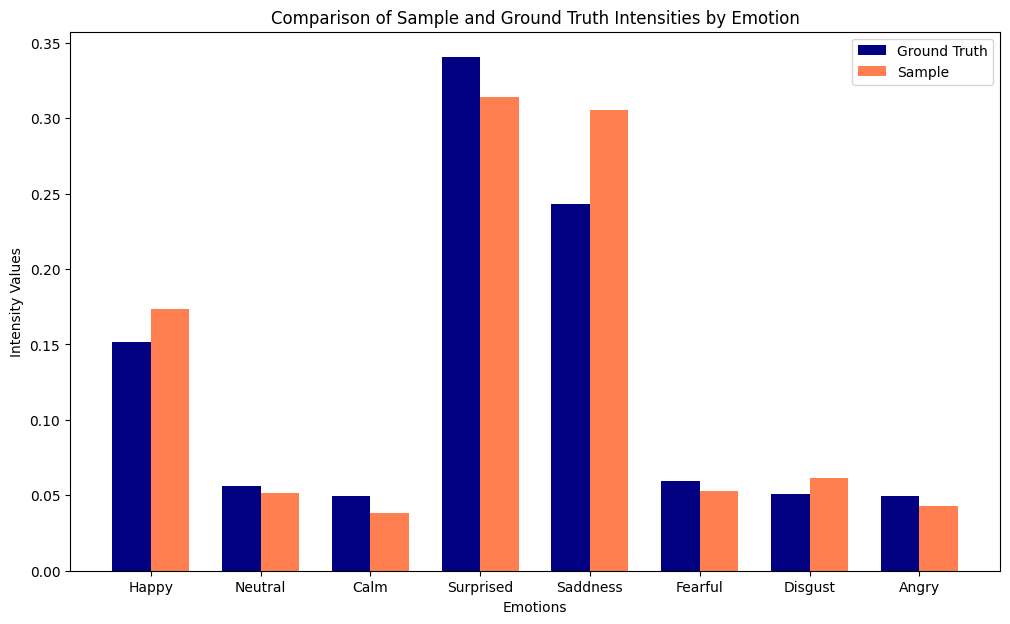

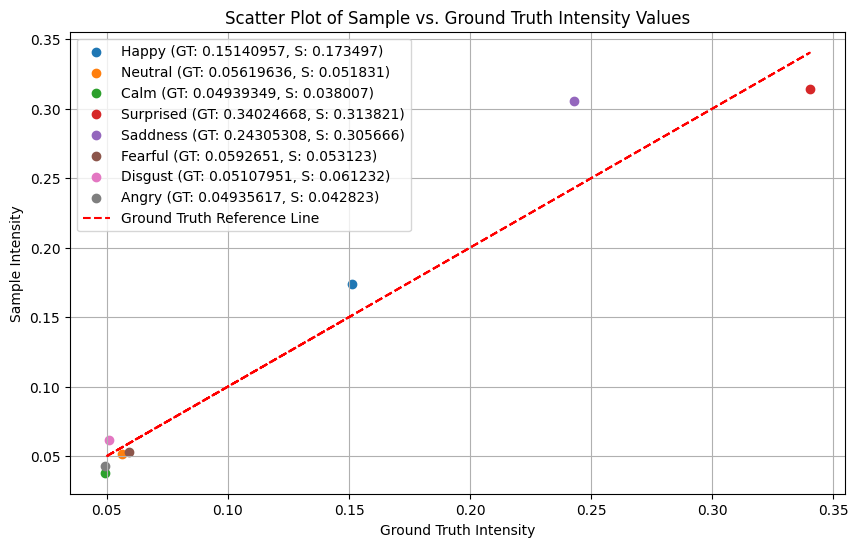

(0.0006798422695878, 0.018713205000000004, 0.9740474271038861)

In [ ]:
# Create overlaid bar charts for visual comparison
fig, ax = plt.subplots(figsize=(12, 7))
width = 0.35  # the width of the bars
indices = np.arange(len(emotions))  # the x locations for the groups

rects1 = ax.bar(indices - width/2, ground_truth, width, label='Ground Truth', color='navy')
rects2 = ax.bar(indices + width/2, sample, width, label='Sample', color='coral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Emotions')
ax.set_ylabel('Intensity Values')
ax.set_title('Comparison of Sample and Ground Truth Intensities by Emotion')
ax.set_xticks(indices)
ax.set_xticklabels(emotions)
ax.legend()

# Create a scatter plot for the same data
# Create a scatter plot with sample values as dots and ground truth as a line
plt.figure(figsize=(10, 6))
for i, text in enumerate(emotions):
    plt.scatter(ground_truth[i], sample[i], label=f"{text} (GT: {ground_truth[i]}, S: {sample[i]})")
plt.plot(ground_truth, ground_truth, 'r--', label='Ground Truth Reference Line')  # Adding a reference line
plt.xlabel('Ground Truth Intensity')
plt.ylabel('Sample Intensity')
plt.title('Scatter Plot of Sample vs. Ground Truth Intensity Values')
plt.legend()
plt.grid(True)

plt.show()

# Calculate statistical measures
mse = np.mean((np.array(ground_truth) - np.array(sample))**2)
mae = np.mean(np.abs(np.array(ground_truth) - np.array(sample)))
correlation_coefficient = np.corrcoef(ground_truth, sample)[0, 1]

mse, mae, correlation_coefficient


Accuracy Measure: A combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE) to measure accuracy. Lower values will correspond to higher scores.

Similarity Measure: Use the correlation coefficient to evaluate the alignment of patterns between the sample and ground truth. A higher correlation can translate into a higher score.

Penalty for Major Deviations: Implement additional penalties for large discrepancies in critical emotions, such as happiness or anger, which may be particularly relevant in customer interactions.

In [ ]:
def calculate_weight(ground_truth, sample):
    weights = np.array(ground_truth) / np.sum(ground_truth)
    return weights


In [ ]:
ground_weight = calculate_weight(ground_truth = ground_truth, sample = sample)

In [ ]:
ground_weight

array([0.15140958, 0.05619636, 0.04939349, 0.34024669, 0.24305309,
       0.0592651 , 0.05107951, 0.04935617])

In [ ]:
# prompt: print emotion and ground_weight side by side, keey 5 decimal points

for i in range(len(emotions)):
  print(f'{emotions[i]}: {ground_weight[i]:.5f}')


Happy: 0.15141
Neutral: 0.05620
Calm: 0.04939
Surprised: 0.34025
Saddness: 0.24305
Fearful: 0.05927
Disgust: 0.05108
Angry: 0.04936


In [ ]:
# prompt: print emotion and their weight horzontaly, in 2 lines

# Print emotion and their weight horizontally, in 2 lines
print("Emotion:", end=" ")
for emotion in emotions:
    print(emotion, end=" ")
print()

print("Weight:", end=" ")
for weight in ground_weight:
    print(f"{weight:.5f}", end=" ")


Emotion: Happy Neutral Calm Surprised Saddness Fearful Disgust Angry 
Weight: 0.15141 0.05620 0.04939 0.34025 0.24305 0.05927 0.05108 0.04936 

In [ ]:
samp = np.array(sample)
groundt = np.array(ground_truth)

In [13]:
samp

array([0.173497, 0.051831, 0.038007, 0.313821, 0.305666, 0.053123,
       0.061232, 0.042823])

In [14]:
percentage_differences = abs(100 * (samp - groundt) / groundt)

print(percentage_differences)

# Square the percentage differences to emphasize larger deviations
squared_percentage_differences = percentage_differences**2

# Apply weights to the squared percentage differences
weighted_squared_differences = ground_weight * squared_percentage_differences

# Sum of weighted squared percentage differences
sum_weighted_squared_differences = np.sum(weighted_squared_differences)
# print("Sum of Weighted Squared Differences:", sum_weighted_squared_differences)

# Adjust the scaling factor
scaling_factor = 0.001
final_score = 100 * np.exp(-scaling_factor * sum_weighted_squared_differences)

print("Final Score:", final_score)

[14.58786918  7.76804761 23.0526128   7.76662391 25.76100661 10.36377227
 19.87585629 13.23678478]
Final Score: 75.66352024143539


In [16]:
squared_percentage_differences

array([212.80592726,  60.34256367, 531.42295708,  60.32044695,
       663.62946146, 107.40777568, 395.04966316, 175.21247139])

In [15]:
ground_weight

array([0.15140958, 0.05619636, 0.04939349, 0.34024669, 0.24305309,
       0.0592651 , 0.05107951, 0.04935617])

In [ ]:
import numpy as np

def provide_emotion_guidance(ground_truth, sample, emotions):
    """
    Provides personalized guidance tailored to each specific emotion,
    suggesting actions to help align emotional responses closer to expected levels.
    """
    differences = np.array(sample) - np.array(ground_truth)
    advice = []
    significant_threshold = 0.02  # Adjust as needed

    for i, diff in enumerate(differences):
        emotion = emotions[i]
        if abs(diff) > significant_threshold:
            if diff > 0:
                # Excess in emotion
                if emotion == "Angry":
                    action = "Remember, staying calm and collected will help you solve customer issues more effectively."
                elif emotion == "Disgust":
                    action = "Try to maintain professionalism and seek understanding, even if a situation is unpleasant."
                elif emotion == "Fearful":
                    action = "Building confidence through knowledge and practice can make challenging interactions easier."
                elif emotion == "Happy":
                    action = "It's great to be happy, but ensure it doesn't overshadow the customer's concerns."
                elif emotion == "Saddness":
                    action = "Maintain a positive demeanor in customer interactions, and seek support if personal feelings are overwhelming."
                elif emotion == "Surprised":
                    action = "Embrace flexibility; unexpected situations are opportunities to excel in service."
                elif emotion == "Neutral":
                    action = "It's important to show warmth and engagement, even if you feel neutral."
                elif emotion == "Calm":
                    action = "While calmness is crucial, too much might appear as disinterest. Ensure to engage actively."
                advice.append(f"Your {emotion} seems a bit high. {action}")
            else:
                # Deficiency in emotion
                if emotion == "Angry":
                    action = "It's healthy to express discontent constructively when needed."
                elif emotion == "Disgust":
                    action = "Being honest about your dislikes can help set clear boundaries in customer interactions."
                elif emotion == "Fearful":
                    action = "Confronting small fears gradually might help strengthen your customer service skills."
                elif emotion == "Happy":
                    action = "Incorporate cheerfulness into your interactions to create a positive customer experience."
                elif emotion == "Saddness":
                    action = "It's okay to show genuine concern, which can make customers feel understood."
                elif emotion == "Surprised":
                    action = "Utilize surprises to adapt and innovate in your responses."
                elif emotion == "Neutral":
                    action = "Showing a bit more enthusiasm could enhance customer engagement."
                elif emotion == "Calm":
                    action = "Leveraging your calm demeanor can be very effective in de-escalating tense situations."
                advice.append(f"Consider boosting your {emotion}. {action}")

    if not advice:
        advice.append("Your emotional responses are well-aligned with optimal customer service practices. Keep up the great work!")

    return advice

# Example usage (Note: You need to define ground_truth and sample arrays properly before using this)

guidance = provide_emotion_guidance(ground_truth, sample, emotions)
for line in guidance:
    print(line)


Your Happy seems a bit high. It's great to be happy, but ensure it doesn't overshadow the customer's concerns.
Consider boosting your Surprised. Utilize surprises to adapt and innovate in your responses.
Your Saddness seems a bit high. Maintain a positive demeanor in customer interactions, and seek support if personal feelings are overwhelming.
